<a href="https://colab.research.google.com/github/imenebv/Sic_Test/blob/main/problem_0701.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quiz #0701

### "TensorFlow machine learning with Calilfornia housing data"

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')    # Turn the warnings off.

In [ ]:
import tensorflow.compat.v1 as tf

#### Answer the following question by providing Python code:

In [ ]:
# Bring the data.
housing_data = fetch_california_housing()

In [ ]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

1). Explore the data:
- Display the dataset as a DataFrame with column labels.

In [ ]:
data = pd.DataFrame(data= housing_data.data, columns=housing_data.feature_names)

In [ ]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.

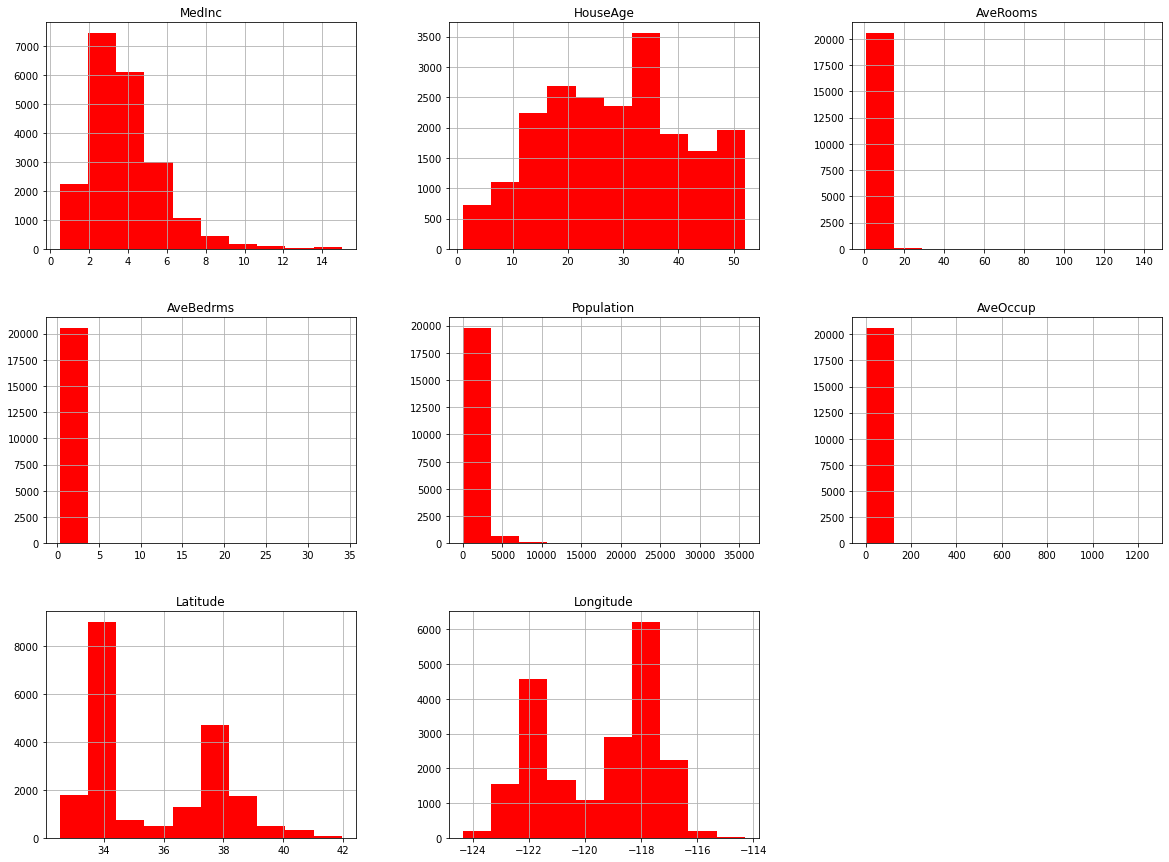

In [ ]:
data.hist(figsize=(20,15), color = 'red')
plt.show()

In [ ]:
print('The null values\n')
print(data.isnull().sum())

The null values

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


We have no missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
data.shape

(20640, 8)

In [ ]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(housing_data['data'], housing_data['target'], test_size=0.2, random_state=14)
#scaling
X_train = scale(X_train, axis=1)
X_test = scale(X_test, axis=1)
X_train.shape

(16512, 8)

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
n = len(X_train)
X = tf.placeholder(tf.float64, shape=X_train.shape)
Y = tf.placeholder(tf.float64)

W = tf.zeros([8,1], name = "W", dtype=tf.float64)
b = tf.Variable(np.random.randn(), name = "b", dtype=tf.float64)

learning_rate = 0.01
training_epochs = 5

y_pred = tf.add(tf.matmul(X, W), b)
#MSE
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)

optimizer = tf.train.MomentumOptimizer(learning_rate,0.9).minimize(cost)
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
     
    sess.run(init)
    for epoch in range(training_epochs):
        print("Epoch : " , epoch)
        
        sess.run(optimizer, feed_dict = {X : X_train, Y : y_train})
        
        if (epoch + 1) % 50 == 0:
            c = sess.run(cost, feed_dict = {X : X_train, Y : y_train})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
     
    training_cost = sess.run(cost, feed_dict ={X: X_train, Y: y_train})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch :  0
Epoch :  1
Epoch :  2
Epoch :  3
Epoch :  4


In [ ]:
R_sq= training_cost/sum((y_train-y_train.mean)**2)
predictions = weight * X_test + bias
print("Training cost =", training_cost, "Weight =", weight, "  bias =", bias,"  R² = ",R_sq,  '\n')